#### Importing Libraries and Dataset

In [1]:
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import seaborn as sns
from tslearn.clustering import TimeSeriesKMeans
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
#from datetime import datetime
consumption_df = pd.read_csv('Final Datasets/energy_consumption.csv')
consumption_df

/home/rishabhjain/anaconda3/lib/python3.8/site-packages/tslearn/clustering/kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


,Unnamed: 0,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...,...
611013,123761,2020-05-19 19:00:00,3.060,28,0.014204,0.019235,0.034654,0.400690,0.001220
611014,123762,2020-05-19 20:00:00,2.940,28,0.013881,0.019240,0.033692,0.385105,0.001174
611015,123763,2020-05-19 21:00:00,1.970,28,0.011269,0.019278,0.025918,0.259123,0.000800
611016,123764,2020-05-19 22:00:00,2.130,28,0.011700,0.019272,0.027200,0.279904,0.000862


In [2]:
if 'Unnamed: 0' in consumption_df.columns:
    consumption_df.drop('Unnamed: 0',axis=1, inplace = True)

In [3]:
consumption_df

,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...
611013,2020-05-19 19:00:00,3.060,28,0.014204,0.019235,0.034654,0.400690,0.001220
611014,2020-05-19 20:00:00,2.940,28,0.013881,0.019240,0.033692,0.385105,0.001174
611015,2020-05-19 21:00:00,1.970,28,0.011269,0.019278,0.025918,0.259123,0.000800
611016,2020-05-19 22:00:00,2.130,28,0.011700,0.019272,0.027200,0.279904,0.000862


#### Converting Dataset to House-wise dictionary

In [4]:
house_wise_consumption = dict()
for house_number in consumption_df['House Number'].unique():
    house_data = consumption_df[consumption_df['House Number'] == house_number]
    house_wise_consumption[house_number] = house_data.copy()
house_wise_consumption[1]
# house_wise_consumption[14]['timestamp'].iloc[0]
# house_wise_consumption[14]['timestamp'].iloc[-1]
# house_wise_consumption[14]['House Number'].iloc[0]

,timestamp,energy_kWh,House Number,electronics workbench energy,network equipment energy,home office energy,RAE home office energy,RAE Mobile Phone Charger Energy
0,2012-06-01 01:00:00,1.011,1,0.008686,0.019316,0.018232,0.134570,0.000431
1,2012-06-01 02:00:00,0.451,1,0.007178,0.019338,0.013745,0.061839,0.000215
2,2012-06-01 03:00:00,0.505,1,0.007324,0.019336,0.014177,0.068852,0.000236
3,2012-06-01 04:00:00,0.441,1,0.007151,0.019339,0.013664,0.060540,0.000211
4,2012-06-01 05:00:00,0.468,1,0.007224,0.019338,0.013881,0.064047,0.000221
...,...,...,...,...,...,...,...,...
29226,2015-10-02 20:00:00,2.101,1,0.011621,0.019273,0.026968,0.276137,0.000851
29227,2015-10-02 21:00:00,1.646,1,0.010396,0.019291,0.023322,0.217043,0.000675
29228,2015-10-02 22:00:00,1.319,1,0.009516,0.019304,0.020701,0.174573,0.000549
29229,2015-10-02 23:00:00,1.473,1,0.009930,0.019298,0.021935,0.194574,0.000609


#### Comparing Timestamps for clustering

In [5]:
timestamp_comparison = list()
for house in house_wise_consumption:
    first_timestamp = house_wise_consumption[house]['timestamp'].iloc[0]
    last_timestamp = house_wise_consumption[house]['timestamp'].iloc[-1]
    timestamp_comparison.append([house, first_timestamp, last_timestamp])
timestamp_comparison
timestamp_comparison_df = pd.DataFrame(timestamp_comparison, columns = ['House', 'First Timestamp', 'Last Timestamp'])
timestamp_comparison_df

,House,First Timestamp,Last Timestamp
0,1,2012-06-01 01:00:00,2015-10-03 00:00:00
1,2,2016-06-09 00:00:00,2019-11-20 23:00:00
2,3,2015-01-27 00:00:00,2018-01-29 23:00:00
3,4,2015-01-30 00:00:00,2018-01-29 23:00:00
4,5,2015-01-30 00:00:00,2018-01-29 23:00:00
5,6,2015-01-30 00:00:00,2018-01-29 23:00:00
6,7,2015-05-30 00:00:00,2018-01-29 23:00:00
7,8,2015-02-21 00:00:00,2018-02-20 23:00:00
8,9,2015-05-01 00:00:00,2018-02-21 23:00:00
9,10,2015-02-21 00:00:00,2018-02-20 23:00:00


In [6]:
# houses_with_ts = []
# sample_timestamp = '2017-11-01 00:00:00'
# for house in house_wise_consumption:
#     if sample_timestamp in house_wise_consumption[house]['timestamp'].unique():
#         houses_with_ts.append(house)
# len(houses_with_ts)
#house_wise_consumption[8][house_wise_consumption[8]['timestamp'] >= '2017-11-17'].head(60)

#### Creating a December consumption dictionary of dataframes

In [7]:
december_consumption = dict()
for house in house_wise_consumption:
    house_december_consumption = house_wise_consumption[house][(house_wise_consumption[house]['timestamp'] <= '2017-11-25') & (house_wise_consumption[house]['timestamp'] >= '2017-11-01')]
    december_consumption[house] = house_december_consumption.copy()
    december_consumption[house].drop_duplicates(subset='timestamp', keep="last", inplace = True)
def calculate_rows():
    december_rows = []
    for house in december_consumption:
        december_rows.append([house, len(december_consumption[house])])
    december_rows
    december_rows_df = pd.DataFrame(december_rows, columns = ['House', 'Rows'])
    return december_rows_df
def calculate_incomplete_rows():
    december_rows_df = calculate_rows()
    december_rows_incomplete_df = december_rows_df[(december_rows_df['Rows'] > 0) & (december_rows_df['Rows'] < 576)]
    return december_rows_incomplete_df
def fill_na_december_consumption(complete_df, incomplete_df):
    complete_df = complete_df.copy()
    year_incomplete = pd.Timestamp(incomplete_df.iloc[0]['timestamp']).year
    year_complete = pd.Timestamp(complete_df.iloc[0]['timestamp']).year
    complete_df['timestamp'] = complete_df['timestamp'].str.replace(str(year_complete), str(year_incomplete))
    fill_missing_values = complete_df[~complete_df.timestamp.isin(incomplete_df.timestamp)].copy()
    #print(fill_missing_values)
    fill_columns = ['energy_kWh', 'electronics workbench energy', 'network equipment energy', 'home office energy', 'RAE home office energy','RAE Mobile Phone Charger Energy']
    for fill_column in fill_columns:
        fill_missing_values[fill_column] = incomplete_df[fill_column].mean()
    incomplete_df = pd.concat([incomplete_df, fill_missing_values])
    incomplete_df = incomplete_df.sort_values(by=['timestamp'])
    return incomplete_df
def calculate_missing_december_rows():
    december_rows_df = calculate_rows()
    december_rows_missing_df = december_rows_df[(december_rows_df['Rows'] == 0)]
    return december_rows_missing_df
calculate_rows()

,House,Rows
0,1,0
1,2,576
2,3,576
3,4,576
4,5,576
5,6,576
6,7,576
7,8,448
8,9,576
9,10,576


In [8]:
for house in list(calculate_incomplete_rows()['House']):
    december_consumption[house] = fill_na_december_consumption(december_consumption[10], december_consumption[house])

##### Houses with no December-17 consumption values

In [9]:
timestamp_comparison_df.set_index('House').join(calculate_missing_december_rows().set_index('House'), how='inner')

,First Timestamp,Last Timestamp,Rows
House,,,
1,2012-06-01 01:00:00,2015-10-03 00:00:00,0
17,2016-06-01 00:00:00,2017-04-29 23:00:00,0
26,2019-11-29 00:00:00,2020-05-20 23:00:00,0
27,2019-03-06 00:00:00,2020-05-20 23:00:00,0
28,2018-08-01 00:00:00,2020-05-19 23:00:00,0


In [10]:
missing_december_houses_dates = {
    1: ['2014-11-25', '2014-11-01'],
    17: ['2016-11-25', '2016-11-01'],
    26: ['2019-11-25', '2019-11-01'],
    27: ['2019-11-25', '2019-11-01'],
    28: ['2019-11-25', '2019-11-01'],
}

In [11]:
for house in missing_december_houses_dates:
    house_december_consumption = house_wise_consumption[house][(house_wise_consumption[house]['timestamp'] <= missing_december_houses_dates[house][0]) & (house_wise_consumption[house]['timestamp'] >= missing_december_houses_dates[house][1])]
    #print((house, missing_december_houses_dates[house][0]))
    december_consumption[house] = house_december_consumption.copy()
    december_consumption[house].drop_duplicates(subset='timestamp', keep="last", inplace = True)

##### Filling missing values for December consumption

In [12]:
calculate_incomplete_rows()

,House,Rows
16,17,574
26,27,571
27,28,572


In [13]:
for house in list(calculate_incomplete_rows()['House']):
    december_consumption[house] = fill_na_december_consumption(december_consumption[10], december_consumption[house])

In [14]:
#calculate_rows()

#### Houses to be clustered

In [15]:
##print('Houses to be clustered: ')
clustered_df = calculate_rows()[calculate_rows()['Rows'] ==  576]
clustered_df

,House,Rows
0,1,576
1,2,576
2,3,576
3,4,576
4,5,576
5,6,576
6,7,576
7,8,576
8,9,576
9,10,576


#### Converting to clustering matrix

In [16]:
clustering_matrix = []
for house in calculate_rows()[calculate_rows()['Rows'] ==  576]['House']:
    clustering_matrix.append(np.array(december_consumption[house]['energy_kWh']).reshape(-1,1))
clustering_matrix = np.array(clustering_matrix)
clustering_matrix.shape

(27, 576, 1)

#### Time series clustering of all households except house 26

In [17]:
km_sdtw = TimeSeriesKMeans(n_clusters=4, metric="softdtw", max_iter=5,
                            max_iter_barycenter=5,
                            metric_params={"gamma": .5},
                            random_state=0).fit_predict(clustering_matrix)

In [18]:
len(km_sdtw)

27

In [19]:
clustered_df['Cluster'] = km_sdtw

In [20]:
clustered_df

,House,Rows,Cluster
0,1,576,0
1,2,576,2
2,3,576,3
3,4,576,0
4,5,576,3
5,6,576,2
6,7,576,2
7,8,576,2
8,9,576,2
9,10,576,2


#### Used Scenarios

In [21]:
data = [[1, 4, 6, 'Yes'], [2, 1, 6, 'Yes'], [3, 4, 1, 'No'], [4, 1, 1, 'No']]
df = pd.DataFrame(data, columns = ['Scenarios', 'No. of subsets', 'No. of features', 'Smart devices included in modeling?']).set_index('Scenarios')
df

,No. of subsets,No. of features,Smart devices included in modeling?
Scenarios,,,
1,4,6,Yes
2,1,6,Yes
3,4,1,No
4,1,1,No


#### Time-series LSTM-based predictive modeling

In [22]:
n_past = 14
n_future = 1

In [23]:
class House:
    cols = ['energy_kWh', 'electronics workbench energy', 'network equipment energy',
            'home office energy', 'RAE home office energy', 'RAE Mobile Phone Charger Energy']
    def __init__(self, house):
        self.house = house
        self.consumption_df = house_wise_consumption[house].copy()[House.cols].astype(float)
        self.train_dates_df = house_wise_consumption[house]['timestamp']
        self.prepare_dataset(n_future, n_past)
    
    def __repr__(self):
        return str(self.house)
    
    def prepare_dataset(self, n_future = 1, n_past = 14):
        #Empty lists to be populated using formatted training data
        trainX = []
        trainY = []
        consumption_np = np.array(self.consumption_df)
        #Reformat input data into a shape: (n_samples x timesteps x n_features)
        #In my example, my self.consumption_df has a shape (12823, 5)
        #12823 refers to the number of data points and 5 refers to the columns (multi-variables).
        for i in range(n_past, len(consumption_np) - n_future +1):
            trainX.append(consumption_np[i - n_past:i, 0:self.consumption_df.shape[1]])
            trainY.append(consumption_np[i + n_future - 1:i + n_future, 0])

        trainX, trainY = np.array(trainX), np.array(trainY)

        #print('trainX shape == {}.'.format(trainX.shape))
        #print('trainY shape == {}.'.format(trainY.shape))
        self.trainX = trainX
        self.trainY = trainY

class Cluster: 
    def __init__(self, houses):
        self.houses = [House(house) for house in houses]
        self.trainX_list = (list(map(lambda x: x.trainX, self.houses)))
        self.trainY_list = (list(map(lambda x: x.trainY, self.houses)))
        self.train_dates_list = (list(map(lambda x: x.train_dates_df, self.houses)))
        self.consumption_df_list = (list(map(lambda x: x.consumption_df, self.houses)))
        self.prepare_dataset()
        
    
    def prepare_dataset(self):
        
        self.train_dates = np.concatenate(self.train_dates_list, axis=0)
        ## TODO - Replace concatenate with for loop or sort by time
        self.X = np.concatenate(self.trainX_list, axis=0)
        self.Y = np.concatenate(self.trainY_list, axis=0)
    
    def prepare_model(self):
        model = Sequential()
        model.add(LSTM(12, activation='relu', input_shape=(self.X.shape[1], self.X.shape[2]), return_sequences=True))
        model.add(LSTM(6, activation='relu', return_sequences=False))
        model.add(Dropout(0.4))
        model.add(Dense(self.Y.shape[1]))
        model.compile(optimizer='adam', loss='mse', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.MeanAbsoluteError()])
        model.summary()
        return model
    
    def train_model(self):
        model = self.prepare_model()
        history = model.fit(self.X, self.Y, epochs=5, batch_size=16, validation_split=0.1, verbose=1)
        self.history = history
        plt.plot(history.history['loss'], label='Training loss')
        plt.plot(history.history['val_loss'], label='Testing loss')
        
        plt.legend()
        return model
    
    def predicted(self):
        model = self.train_model()
        predictions = list(map(lambda x: pd.Series(model.predict(x).reshape(1,-1)[0]), self.trainX_list))
        #return pd.Series(model.predict(self.X).reshape(1,-1)[0])
        return dict(zip(self.houses, predictions))
    
    def results(self):
        predicted = self.predicted()
        house_prediction_list_df  = {}
        for house in predicted:
            house_prediction_df = house.consumption_df.iloc[n_past:].copy().reset_index(drop=True)
            house_prediction_df['timestamp'] = house.train_dates_df.iloc[n_past:].copy().reset_index(drop=True)
            house_prediction_df['energy_predicted'] = predicted[house]
            house_prediction_list_df[house.house] = house_prediction_df
        return house_prediction_list_df

#### Scenario 1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 16)            1472      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
9875/9875 [==============================] - 90s 9ms/step - loss: 0.6221 - root_mean_squared_error: 0.7888 - mean_absolute_error: 0.4948 - val_loss: 0.6843 - val_root_mean_squa

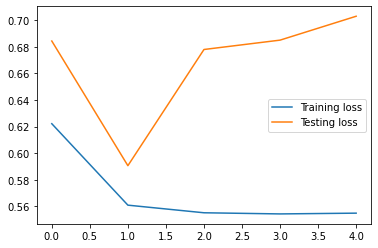

In [24]:
zero_houses = list(clustered_df[clustered_df['Cluster'] == 0]['House'])
zero_cluster = Cluster(zero_houses)
zero_cluster_results = zero_cluster.results()
print('Training History for Cluster 0:')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 14, 16)            1472      
                                                                 
 lstm_3 (LSTM)               (None, 8)                 800       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1176/1176 [==============================] - 9s 7ms/step - loss: 2.0658 - root_mean_squared_error: 1.4373 - mean_absolute_error: 0.8701 - val_loss: 3.6526 - val_root_mean_squ

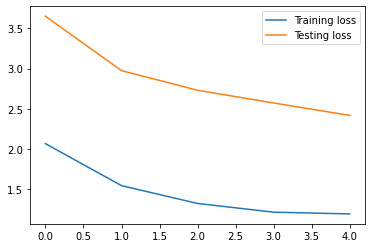

In [25]:
one_houses = list(clustered_df[clustered_df['Cluster'] == 1]['House'])
one_cluster = Cluster(one_houses)
one_cluster_results = one_cluster.results()
print('Training History for Cluster 1:')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 16)            1472      
                                                                 
 lstm_5 (LSTM)               (None, 8)                 800       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
19536/19536 [==============================] - 176s 9ms/step - loss: 0.1885 - root_mean_squared_error: 0.4341 - mean_absolute_error: 0.2608 - val_loss: 0.2354 - val_root_mean

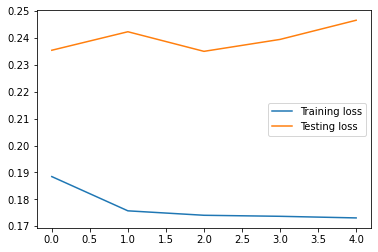

In [26]:
two_houses = list(clustered_df[clustered_df['Cluster'] == 2]['House'])
two_cluster = Cluster(two_houses)
two_cluster_results = two_cluster.results()
print('Training History for Cluster 2:')

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 14, 16)            1472      
                                                                 
 lstm_7 (LSTM)               (None, 8)                 800       
                                                                 
 dropout_3 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3530/3530 [==============================] - 33s 9ms/step - loss: 0.4518 - root_mean_squared_error: 0.6722 - mean_absolute_error: 0.4380 - val_loss: 0.6141 - val_root_mean_sq

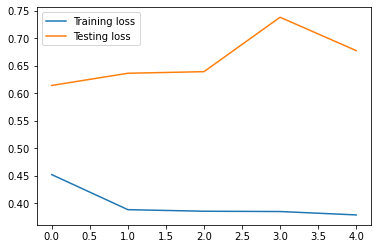

In [27]:
three_houses = list(clustered_df[clustered_df['Cluster'] == 3]['House'])
three_cluster = Cluster(three_houses)
three_cluster_results = three_cluster.results()
print('Training History for Cluster 3:')

#### Scenario 2

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 14, 16)            1472      
                                                                 
 lstm_9 (LSTM)               (None, 8)                 800       
                                                                 
 dropout_4 (Dropout)         (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,281
Trainable params: 2,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
34115/34115 [==============================] - 271s 8ms/step - loss: 0.3890 - root_mean_squared_error: 0.6237 - mean_absolute_error: 0.3634 - val_loss: 0.4004 - val_root_mean

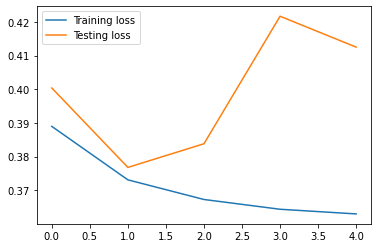

In [28]:
all_houses = list(clustered_df['House'])
all_cluster = Cluster(all_houses)
all_cluster_results = all_cluster.results()
print('Training History without clustering:')

#### Predictions Graph functions

In [29]:
def x_axis_label_format(label):
    """
    Convert time label to the format of pandas line plot
    """
    label = pd.Timestamp(label)
    month = label.month_name()[:3]
    #if month == 'Jan':
    month += f'\n{label.year}'
    return month

def graph_predictions(cluster_specific_results, all_results):
    first_house = list(cluster_specific_results.keys())[0]
    df1 = cluster_specific_results[first_house][['timestamp','energy_predicted', 'energy_kWh']]
    df1['timestamp'] = pd.to_datetime(df1['timestamp'])
    df1 = df1.set_index('timestamp')
    df1['energy_predicted_without_clustering']= np.array(all_results[first_house][['energy_predicted']])
    df1.rename({'energy_predicted':'energy_predicted_with_clustering', 'energy_kWh':'real_energy'},axis = 1, inplace = True)
    ax = df1[::300].plot.line(figsize=(20,10))
    #ax.set_xticklabels(map(x_axis_label_format, df1[::int(len(df1)/8)+1].index))
    #import matplotlib.dates as mdates
    #myFmt = mdates.DateFormatter('%Y-%m')
    #ax.xaxis.set_major_formatter(myFmt)
    ax.set_title(f'Predictions for house {first_house}')

#### Predictions for Scenario 1 and Scenario 2 

<ipython-input-29-9643f5cc2f5c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df1['timestamp'])


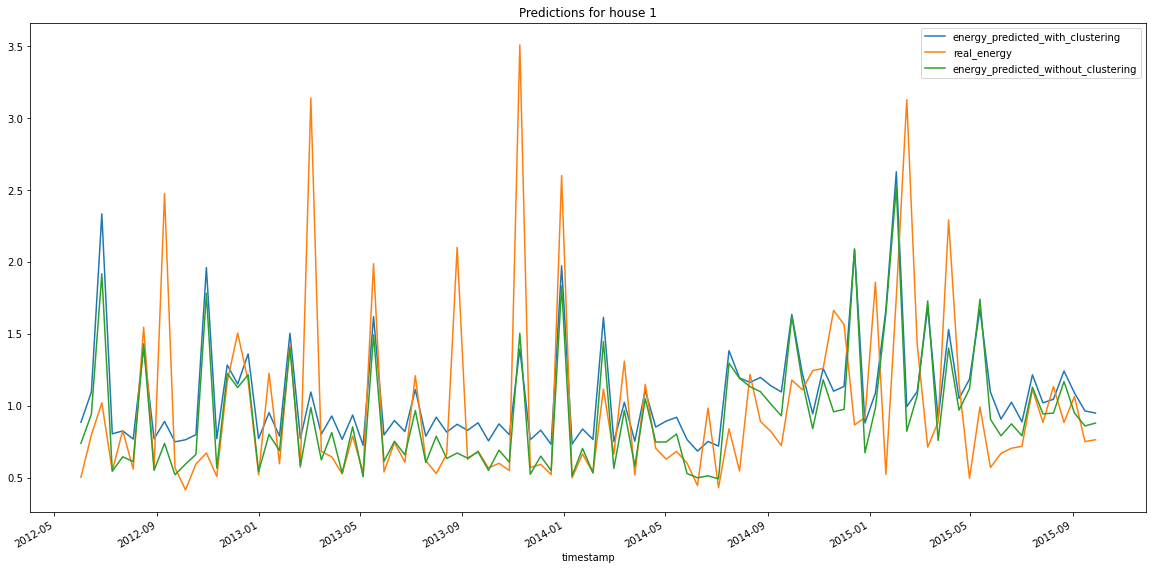

In [30]:
graph_predictions(zero_cluster_results, all_cluster_results)
#df1 = zero_cluster_results[1][['timestamp','energy_predicted', 'energy_kWh']].set_index('timestamp')
#df1['energy_predicted_without_clustering']= np.array(all_cluster_results[1][['energy_predicted']])

<ipython-input-29-9643f5cc2f5c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df1['timestamp'])


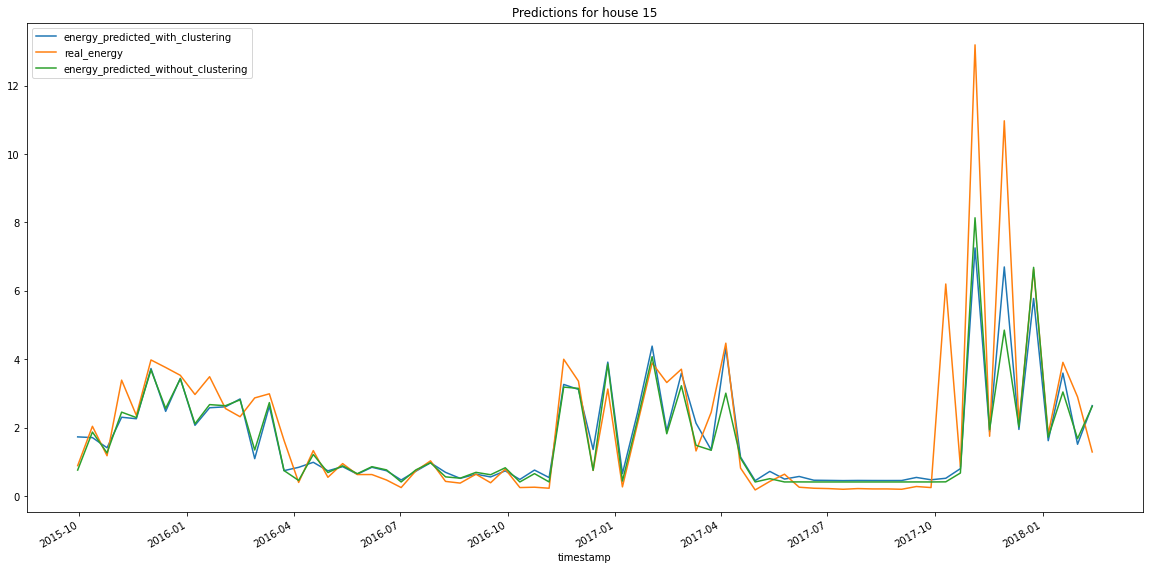

In [31]:
graph_predictions(one_cluster_results, all_cluster_results)

<ipython-input-29-9643f5cc2f5c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df1['timestamp'])


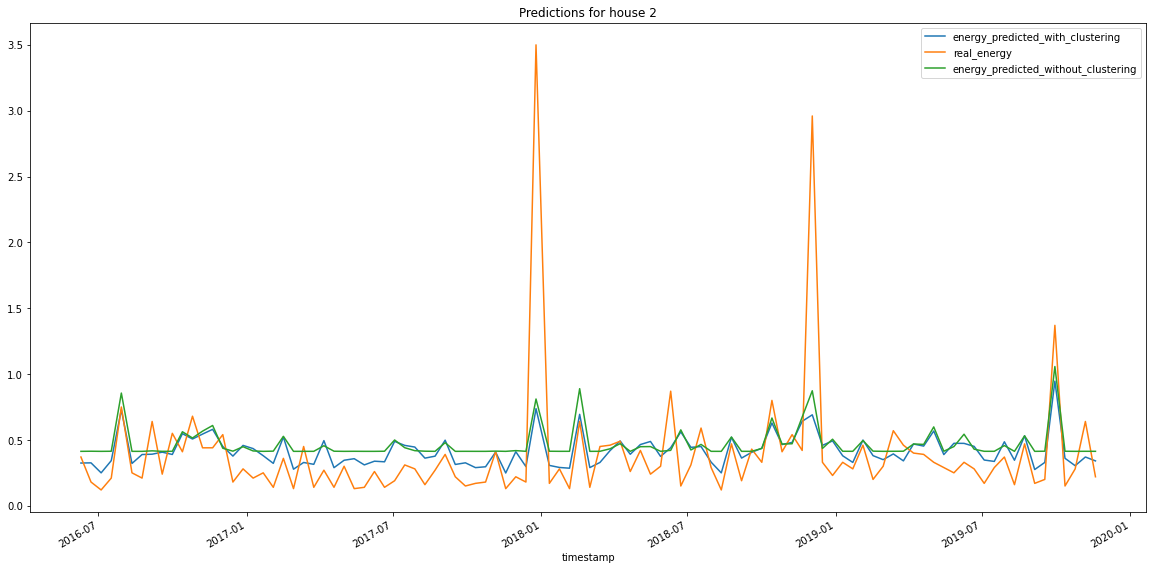

In [32]:
graph_predictions(two_cluster_results, all_cluster_results)

<ipython-input-29-9643f5cc2f5c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['timestamp'] = pd.to_datetime(df1['timestamp'])


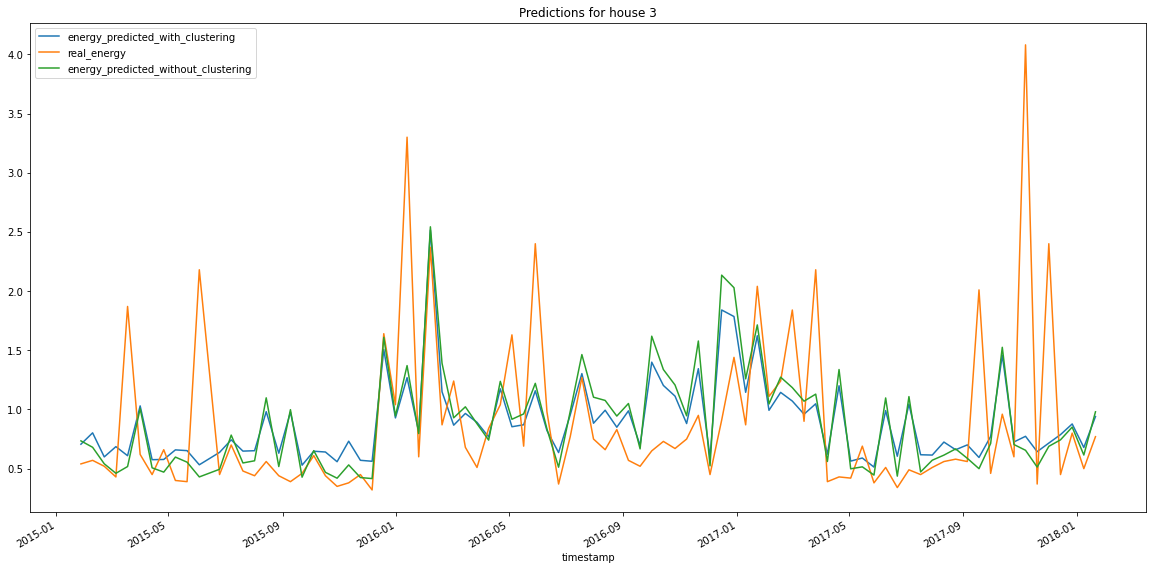

In [33]:
graph_predictions(three_cluster_results, all_cluster_results)

### Function to create tables

In [34]:
def create_metrics(scenario_results, val=False):
    if val == False:
        rmse = 'root_mean_squared_error'
        mae = 'mean_absolute_error'
    else:
        rmse = 'val_root_mean_squared_error'
        mae = 'val_mean_absolute_error'
    scenario_rmse = list(map(lambda x: x.history.history[rmse],scenario_results))
    scenario_mae = list(map(lambda x: x.history.history[mae],scenario_results))
    scenario_rmse = np.array(scenario_rmse).reshape(-1,)
    scenario_mae = np.array(scenario_mae).reshape(-1,)
    return [np.min(scenario_rmse),np.max(scenario_rmse),np.mean(scenario_rmse),np.min(scenario_mae),np.max(scenario_mae),np.mean(scenario_mae)]

#### Scenario 1 and Scenario 2 Metric Tables

In [35]:
scenario_1_results = [zero_cluster, one_cluster, two_cluster, three_cluster]
scenario_1_metrics = create_metrics(scenario_1_results)
scenario_1_validation_metrics = create_metrics(scenario_1_results, val= True)
scenario_1_metrics

[0.4160751402378082,
 1.4372918605804443,
 0.7523616716265679,
 0.2454218715429306,
 0.8701297640800476,
 0.45979547053575515]

In [36]:
scenario_2_results = [all_cluster]
scenario_2_metrics = create_metrics(scenario_2_results)
scenario_2_validation_metrics = create_metrics(scenario_2_results, val= True)
scenario_2_metrics

[0.6024802923202515,
 0.6236790418624878,
 0.6093257188796997,
 0.34753283858299255,
 0.36340877413749695,
 0.35220085978508]

#### Scenario 3 and 4

In [37]:
### Removing smart device features
House.cols = ['energy_kWh']
#House.cols

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_10 (LSTM)              (None, 14, 16)            1152      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 800       
                                                                 
 dropout_5 (Dropout)         (None, 8)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
9875/9875 [==============================] - 80s 8ms/step - loss: 0.6856 - root_mean_squared_error: 0.8280 - mean_absolute_error: 0.5358 - val_loss: 0.6729 - val_root_mean_sq

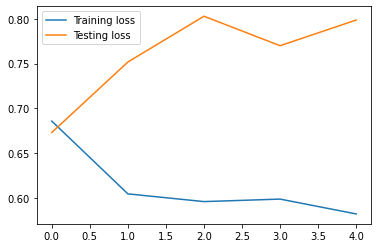

In [38]:
scenario_3_zero_cluster = Cluster(zero_houses)
scenario_3_zero_cluster_results = scenario_3_zero_cluster.results()
print('Training History for Cluster 0:')

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 14, 16)            1152      
                                                                 
 lstm_13 (LSTM)              (None, 8)                 800       
                                                                 
 dropout_6 (Dropout)         (None, 8)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1176/1176 [==============================] - 8s 6ms/step - loss: 2.0393 - root_mean_squared_error: 1.4281 - mean_absolute_error: 0.8338 - val_loss: 3.7518 - val_root_mean_squ

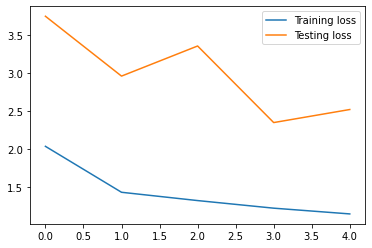

In [39]:
scenario_3_one_cluster = Cluster(one_houses)
scenario_3_one_cluster_results = scenario_3_one_cluster.results()
print('Training History for Cluster 1:')

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 14, 16)            1152      
                                                                 
 lstm_15 (LSTM)              (None, 8)                 800       
                                                                 
 dropout_7 (Dropout)         (None, 8)                 0         
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
19536/19536 [==============================] - 172s 9ms/step - loss: 0.1851 - root_mean_squared_error: 0.4302 - mean_absolute_error: 0.2582 - val_loss: 0.2363 - val_root_mean

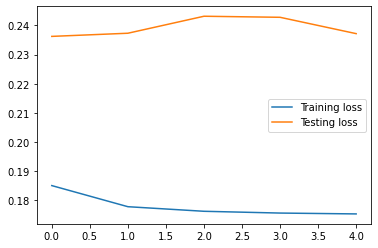

In [40]:
scenario_3_two_cluster = Cluster(two_houses)
scenario_3_two_cluster_results = scenario_3_two_cluster.results()
print('Training History for Cluster 2:')

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 14, 16)            1152      
                                                                 
 lstm_17 (LSTM)              (None, 8)                 800       
                                                                 
 dropout_8 (Dropout)         (None, 8)                 0         
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
3530/3530 [==============================] - 34s 9ms/step - loss: 0.4628 - root_mean_squared_error: 0.6803 - mean_absolute_error: 0.4481 - val_loss: 0.8475 - val_root_mean_sq

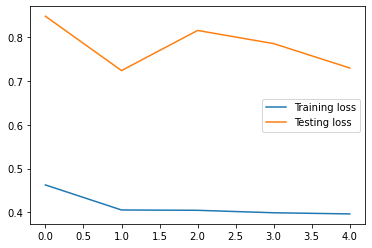

In [41]:
scenario_3_three_cluster = Cluster(three_houses)
scenario_3_three_cluster_results = scenario_3_three_cluster.results()
print('Training History for Cluster 3:')

#### Scenario 4

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_18 (LSTM)              (None, 14, 16)            1152      
                                                                 
 lstm_19 (LSTM)              (None, 8)                 800       
                                                                 
 dropout_9 (Dropout)         (None, 8)                 0         
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,961
Trainable params: 1,961
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
34115/34115 [==============================] - 309s 9ms/step - loss: 0.4007 - root_mean_squared_error: 0.6330 - mean_absolute_error: 0.3712 - val_loss: 0.3954 - val_root_mean

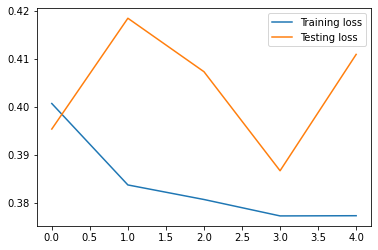

In [42]:
scenario_4_all_cluster = Cluster(all_houses)
scenario_4_all_cluster_results = scenario_4_all_cluster.results()
print('Training History without clustering:')

#### Predictions for Scenario 3 and Scenario 4

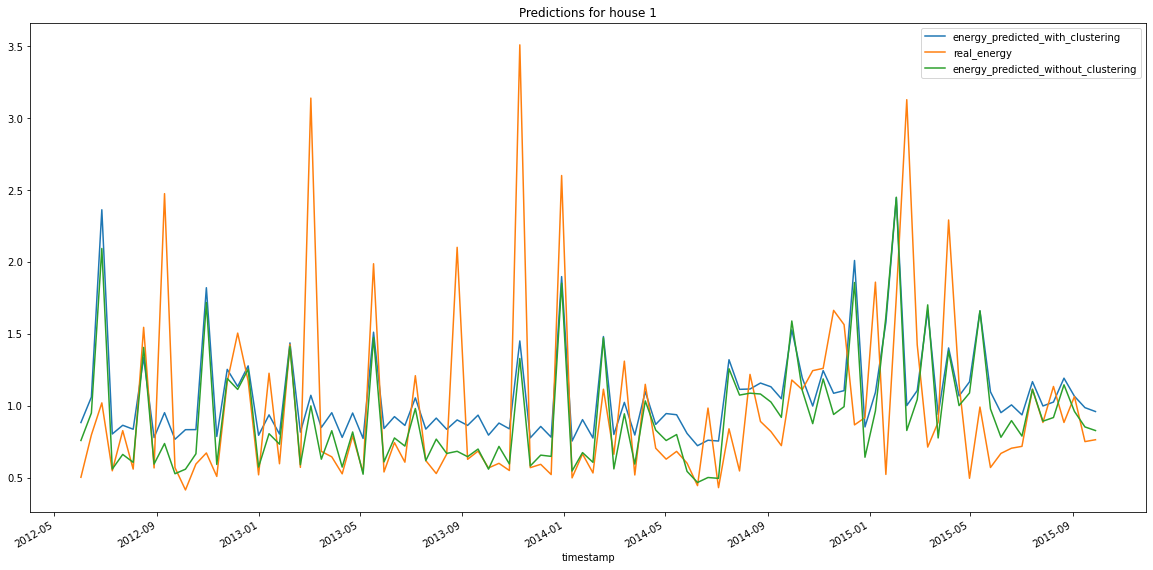

In [43]:
graph_predictions(scenario_3_zero_cluster_results, scenario_4_all_cluster_results)

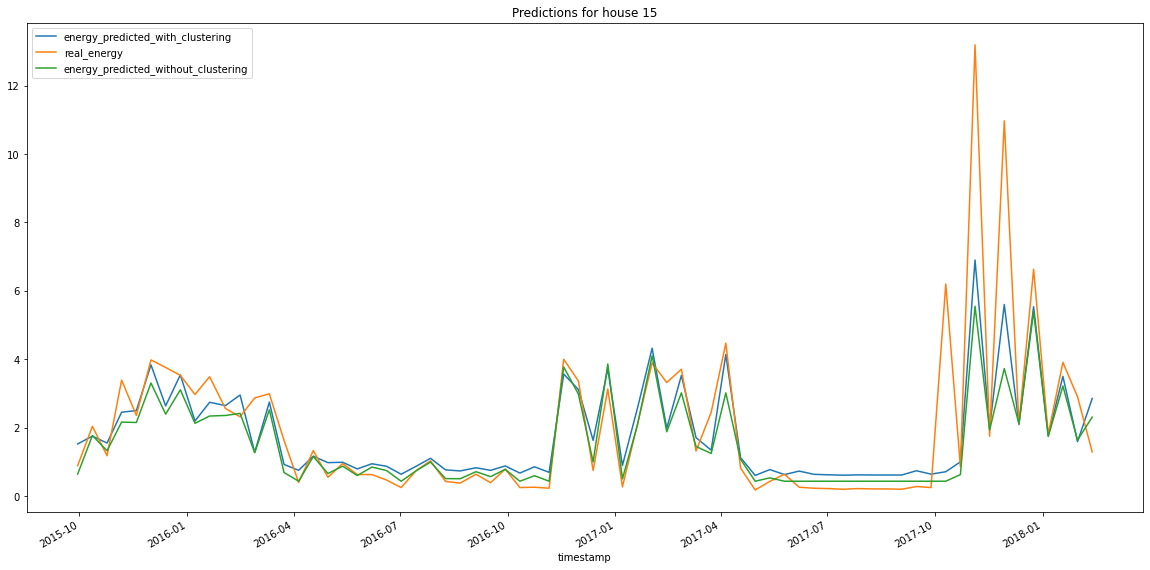

In [44]:
graph_predictions(scenario_3_one_cluster_results, scenario_4_all_cluster_results)

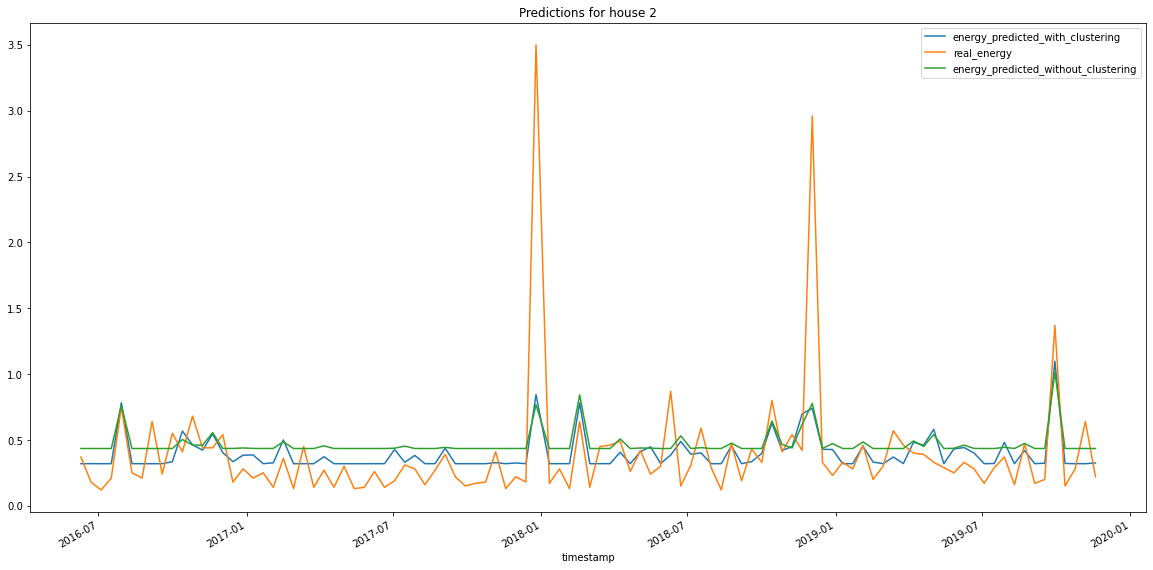

In [45]:
graph_predictions(scenario_3_two_cluster_results, scenario_4_all_cluster_results)

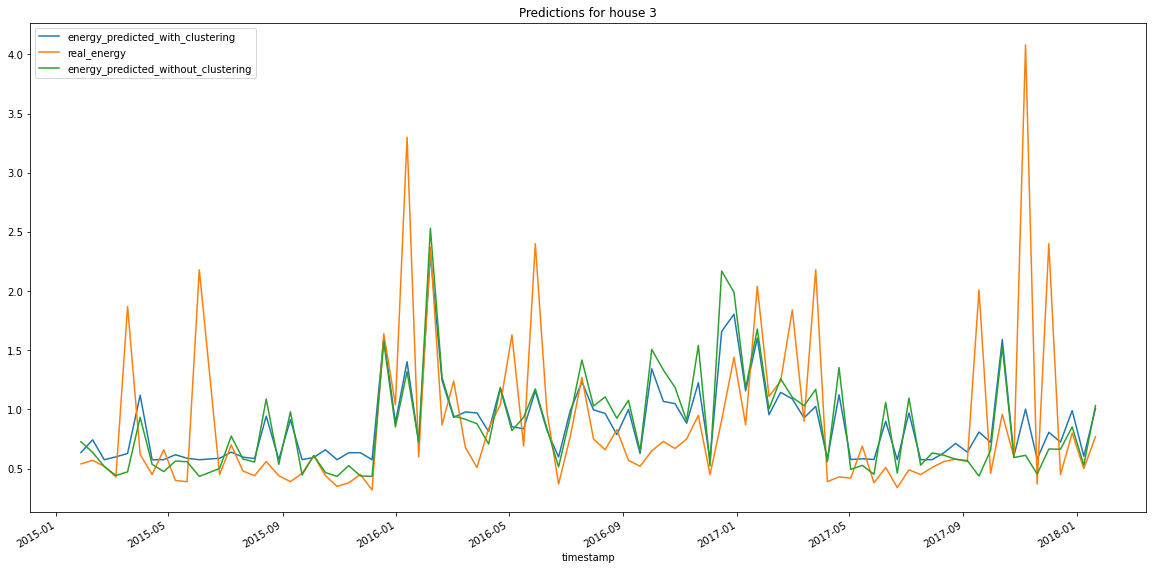

In [46]:
graph_predictions(scenario_3_three_cluster_results, scenario_4_all_cluster_results)

#### Scenario 3 and Scenario 4 Metric Tables

In [47]:
scenario_3_results = [scenario_3_zero_cluster, scenario_3_one_cluster, scenario_3_two_cluster, scenario_3_three_cluster]
scenario_3_metrics = create_metrics(scenario_3_results )
scenario_3_validation_metrics = create_metrics(scenario_3_results, val= True)
scenario_3_metrics

[0.4187606871128082,
 1.428053617477417,
 0.7597387656569481,
 0.2467326819896698,
 0.833756685256958,
 0.46847053468227384]

In [48]:
scenario_4_results = [scenario_4_all_cluster]
scenario_4_metrics = create_metrics(scenario_4_results )
scenario_4_validation_metrics = create_metrics(scenario_4_results, val= True)
scenario_4_metrics

[0.6141994595527649,
 0.6330053806304932,
 0.6195720195770263,
 0.3581933081150055,
 0.37116414308547974,
 0.36173899173736573]

In [49]:
print('Training metrics:')
df = pd.DataFrame([scenario_1_metrics, scenario_2_metrics, scenario_3_metrics, scenario_4_metrics],index=[1,2,3,4], columns = ['Min RMSE', 'Max RMSE', 'Mean RMSE','Min MAE', 'Max MAE', 'Mean MAE'])
df['Scenario'] = np.array([1,2,3,4])
df.set_index('Scenario')

Training metrics:


,Min RMSE,Max RMSE,Mean RMSE,Min MAE,Max MAE,Mean MAE
Scenario,,,,,,
1,0.416075,1.437292,0.752362,0.245422,0.870130,0.459795
2,0.602480,0.623679,0.609326,0.347533,0.363409,0.352201
3,0.418761,1.428054,0.759739,0.246733,0.833757,0.468471
4,0.614199,0.633005,0.619572,0.358193,0.371164,0.361739


In [50]:
print('Validation metrics:')
df = pd.DataFrame([scenario_1_validation_metrics, scenario_2_validation_metrics,
                   scenario_3_validation_metrics, scenario_4_validation_metrics],index=[1,2,3,4], columns = ['Min RMSE', 'Max RMSE', 'Mean RMSE','Min MAE', 'Max MAE', 'Mean MAE'])
df['Scenario'] = np.array([1,2,3,4])
df.set_index('Scenario')

Validation metrics:


,Min RMSE,Max RMSE,Mean RMSE,Min MAE,Max MAE,Mean MAE
Scenario,,,,,,
1,0.484783,1.911166,0.952155,0.260933,1.184868,0.599454
2,0.613835,0.649365,0.631549,0.364831,0.380849,0.373308
3,0.486059,1.936962,0.991445,0.266102,1.137347,0.626597
4,0.621825,0.646909,0.635359,0.373418,0.386179,0.379338
